## Présentation générale du jeu de données
## Démarche méthodologique d’analyse de données 
## Synthèse de l’analyse de données

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [2]:
df = pd.read_csv("data/p2-arbres-fr.csv", delimiter=";", decimal=",")

### Analyse naive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

On peut noter que les deux derniere colonnes geo point sont certainement des valeur numériques, il doit donc y avoir de mauvaise valeurs dans certaines lignes

renomons les colones puis vérifions le type des colonnes GEO_POINT

#### Renaming columns

In [4]:
dict_names = {}
for name in df.columns:
    new_name = name.lower().replace(" ", "_")
    dict_names[name] = new_name
df.rename(columns=dict_names, inplace=True)

#### changement du type de geo_point

In [5]:
df[["geo_point_2d_a", "geo_point_2d_b"]]= df[["geo_point_2d_a", "geo_point_2d_b"]].astype("Float64")

### Analyse univariée

In [6]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0000000000,48.8576199541,2.3209621099
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.8576560697,2.3210314229
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.8577050069,2.3210605660
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.8577220449,2.3210058253
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.8904352883,2.3152894588


#### Affichage des valeurs nulles en barplot

<Figure size 1000x600 with 0 Axes>

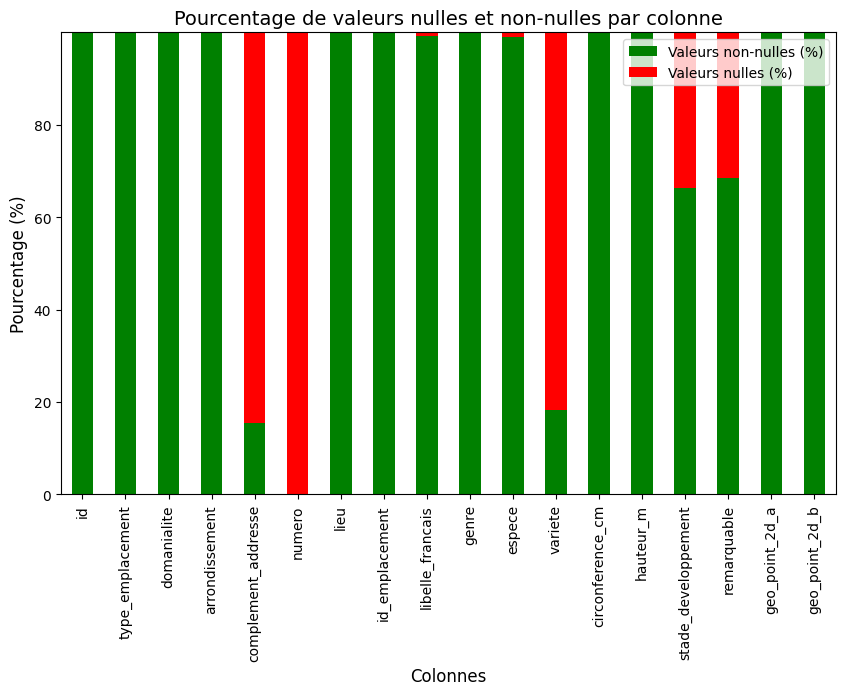

In [7]:

import matplotlib.pyplot as plt

# Supposons que df soit ton DataFrame

# Calculer le pourcentage de valeurs nulles et non-nulles par colonne
pourcentage_null = (df.isnull().sum() / len(df)) * 100
pourcentage_non_null = 100 - pourcentage_null

# Créer un DataFrame avec les deux pourcentages
pourcentage_df = pd.DataFrame({
    'Valeurs nulles (%)': pourcentage_null,
    'Valeurs non-nulles (%)': pourcentage_non_null
})

# Créer un graphique en barres empilées
plt.figure(figsize=(10, 6))
pourcentage_df[['Valeurs non-nulles (%)', 'Valeurs nulles (%)']].plot(
    kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter des labels et un titre
plt.title('Pourcentage de valeurs nulles et non-nulles par colonne', fontsize=14)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)

# Afficher la légende et le graphique
plt.legend(loc='upper right')
plt.show()


On peut déja conclure de la colonne “numero” ne va pas nous servir car elle ne contient aucune information. De meme pour “complement adresse” ou “variete” 

on retire ces 3 colonnes 

In [8]:
df.drop(columns=["numero","complement_addresse", "variete"], inplace=True)

#### Analyse des colonnes numériques

In [9]:
df_number = df.select_dtypes(include=["number"])

Nous ne ferons pas d'analyse sur:
- **id** qui est simplement un identifiant pour les arbre dans ce dataframe

In [10]:
df_number.drop(columns=["id"], inplace=True)

In [11]:
df_number

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
0,20,5,0.0000000000,48.8576199541,2.3209621099
1,65,8,NaN,48.8576560697,2.3210314229
2,90,10,NaN,48.8577050069,2.3210605660
3,60,8,NaN,48.8577220449,2.3210058253
4,38,0,NaN,48.8904352883,2.3152894588
...,...,...,...,...,...
200132,0,0,0.0000000000,48.8219566889,2.4562636652
200133,0,0,0.0000000000,48.8232535747,2.4579345009
200134,0,0,0.0000000000,48.8229071371,2.4579700696
200135,0,0,0.0000000000,48.8225223402,2.4559555462


### Analyse des variables descriptives

In [12]:
df_object = df.select_dtypes(include=["object"])

Nombre de valeur unique pour chaque colonnes

In [13]:
len(df_object["arrondissement"].value_counts())

25

In [14]:
for col in df_object:
    print(col,"a",len(df_object[col].value_counts()), "valeur(s) unique(s)")

print("Nombre de ligne du df_object:", df_object.shape[0])


type_emplacement a 1 valeur(s) unique(s)
domanialite a 9 valeur(s) unique(s)
arrondissement a 25 valeur(s) unique(s)
lieu a 6921 valeur(s) unique(s)
id_emplacement a 69040 valeur(s) unique(s)
libelle_francais a 192 valeur(s) unique(s)
genre a 175 valeur(s) unique(s)
espece a 539 valeur(s) unique(s)
stade_developpement a 4 valeur(s) unique(s)
Nombre de ligne du df_object: 200137


Beaucoup trop de valeur unique pour ''' "id_emplacement", "lieu", "libelle_francais", "genre", "espece" ''' pour les afficher en bar plot, on va donc regarder les 10 valeur les plus présentes

In [83]:
df_lieu = df_object[["lieu"]].value_counts().reset_index()
result = df_object[["lieu"]].value_counts() * 100 / df_object["lieu"].value_counts().shape[0]
df_lieu["pourcentage d'apparition"] = result.reset_index()["count"]

In [87]:
test = {"lieu":df_lieu}
test["lieu"]

,lieu,count,pourcentage d'apparition
0,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,2995,43.2740933391
1,PARC DES BUTTES CHAUMONT,2331,33.6801040312
2,PARC ANDRE CITROEN,2095,30.2701921688
3,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,1478,21.3552954775
4,INSEP / AVENUE DU TREMBLAY,1293,18.6822713481
...,...,...,...
6916,CIMETIERE DU PERE LACHAISE / AVENUE DES THUYAS...,1,0.0144487791
6917,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 10,1,0.0144487791
6918,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 4,1,0.0144487791
6919,CARREFOUR ODEON,1,0.0144487791


In [108]:
from IPython.display import display

lot_of_row = ["id_emplacement", "lieu", "libelle_francais", "genre", "espece"]
df_list = {}
for col in lot_of_row:
    df_temp = df_object[[col]].value_counts().reset_index()
    result = df_object[[col]].value_counts() * 100 / df_object[col].shape[0]
    df_temp["apparition"] = result.reset_index()["count"]
    df_list[col] = df_temp

    print(col.upper())
    display(df_list[col],display_id=col)

ID_EMPLACEMENT


,id_emplacement,count,apparition
0,101001,1324,0.6615468404
1,101002,1241,0.6200752485
2,101003,1128,0.5636139245
3,202001,1032,0.5156467820
4,101004,1020,0.5096508891
...,...,...,...
69035,80269,1,0.0004996577
69036,80270,1,0.0004996577
69037,80271,1,0.0004996577
69038,80272,1,0.0004996577


LIEU


,lieu,count,apparition
0,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,2995,1.4964749147
1,PARC DES BUTTES CHAUMONT,2331,1.1647021790
2,PARC ANDRE CITROEN,2095,1.0467829537
3,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,1478,0.7384941315
4,INSEP / AVENUE DU TREMBLAY,1293,0.6460574506
...,...,...,...
6916,CIMETIERE DU PERE LACHAISE / AVENUE DES THUYAS...,1,0.0004996577
6917,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 10,1,0.0004996577
6918,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 4,1,0.0004996577
6919,CARREFOUR ODEON,1,0.0004996577


LIBELLE_FRANCAIS


,libelle_francais,count,apparition
0,Platane,42508,21.2394509761
1,Marronnier,25207,12.5948725123
2,Tilleul,21305,10.6452080325
3,Erable,18389,9.1882060788
4,Sophora,11797,5.8944622933
...,...,...,...
187,Maackie,1,0.0004996577
188,Ormeau épineux,1,0.0004996577
189,Ostryer,1,0.0004996577
190,Papayer,1,0.0004996577


GENRE


,genre,count,apparition
0,Platanus,42591,21.2809225680
1,Aesculus,25341,12.6618266487
2,Tilia,21550,10.7676241774
3,Acer,18471,9.2291780131
4,Sophora,11830,5.9109509986
...,...,...,...
170,Sciadopitys,1,0.0004996577
171,Phoenix,1,0.0004996577
172,Phyllanthus,1,0.0004996577
173,Pistacia,1,0.0004996577


ESPECE


,espece,count,apparition
0,x hispanica,36409,18.1920384537
1,hippocastanum,20039,10.0126413407
2,japonica,11822,5.9069537367
3,n. sp.,9063,4.5283980473
4,tomentosa,8962,4.4779326162
...,...,...,...
534,robusta,1,0.0004996577
535,rosmarinifolia,1,0.0004996577
536,rufa,1,0.0004996577
537,rysophylla,1,0.0004996577


In [103]:
df_list["espece"]["apparition"].sum()

np.float64(99.12459964924028)

,lieu,count,pourcentage d'apparition,genre,count,pourcentage d'apparition
0,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,2995,43.2740933391,Platanus,42591.0000000000,24337.7142857143
1,PARC DES BUTTES CHAUMONT,2331,33.6801040312,Aesculus,25341.0000000000,14480.5714285714
2,PARC ANDRE CITROEN,2095,30.2701921688,Tilia,21550.0000000000,12314.2857142857
3,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,1478,21.3552954775,Acer,18471.0000000000,10554.8571428571
4,INSEP / AVENUE DU TREMBLAY,1293,18.6822713481,Sophora,11830.0000000000,6760.0000000000
...,...,...,...,...,...,...
6916,CIMETIERE DU PERE LACHAISE / AVENUE DES THUYAS...,1,0.0144487791,NaN,NaN,NaN
6917,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 10,1,0.0144487791,NaN,NaN,NaN
6918,CIMETIERE DE SAINT-OUEN ANCIEN / DIV 4,1,0.0144487791,NaN,NaN,NaN
6919,CARREFOUR ODEON,1,0.0144487791,NaN,NaN,NaN


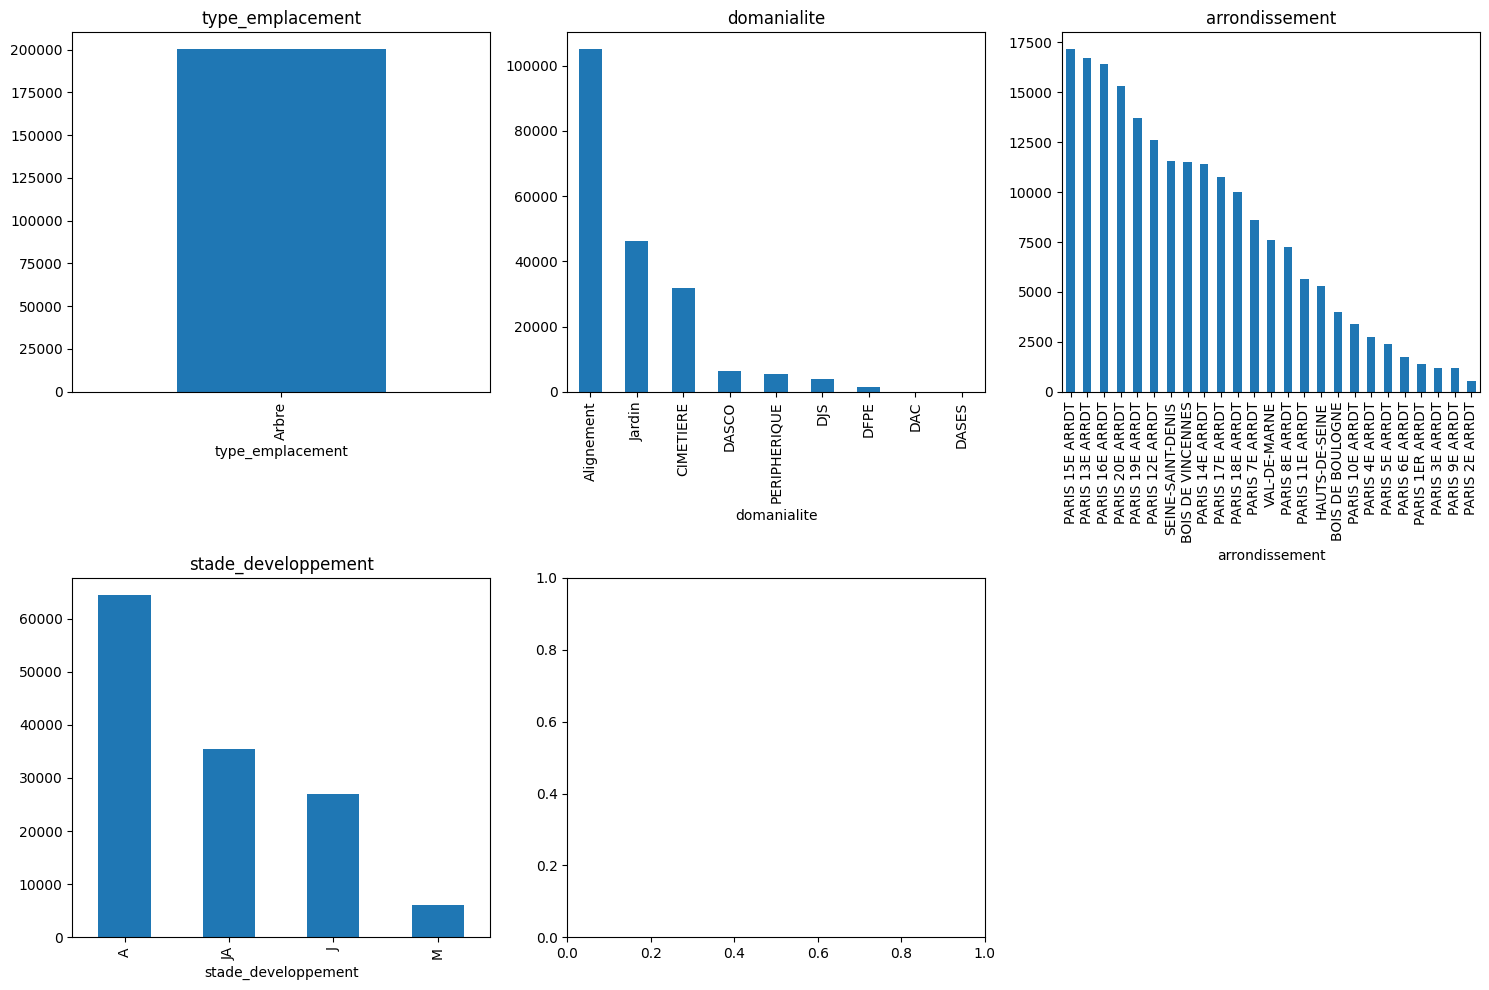

In [17]:
lot_of_row = ["id_emplacement", "lieu", "libelle_francais", "genre", "espece"]

df_plot_objet = df_object.drop(columns=lot_of_row)

num_plots = df_plot_objet.shape[1]

num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()
i= 0
for col in df_object.drop(columns=lot_of_row):
    
    value_counts = df_object[col].value_counts()
    
    value_counts.plot(kind="bar", ax=axes[i], title=col)
    i+=1
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()